# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [2]:
weather_api_key

'e18f52b5e0785e2068dc55d88129625d'

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 619


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url =  url + "&q=" + city
    print(city_url)
    
    # Log the url, record, and set numbers
    print(f"Processing Record {record_count} of Set {set_count} | {city}")

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        print(city_weather)
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                            "Lat": city_lat, 
                            "Lng": city_lng, 
                            "Max Temp": city_max_temp,
                            "Humidity": city_humidity,
                            "Cloudiness": city_clouds,
                            "Wind Speed": city_wind,
                            "Country": city_country,
                            "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=e18f52b5e0785e2068dc55d88129625d&q=las tablas
Processing Record 1 of Set 1 | las tablas
{'coord': {'lon': -80.2833, 'lat': 7.7667}, 'weather': [{'id': 501, 'main': 'Rain', 'description': 'moderate rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 28.99, 'feels_like': 35.99, 'temp_min': 28.99, 'temp_max': 28.99, 'pressure': 1008, 'humidity': 99, 'sea_level': 1008, 'grnd_level': 1004}, 'visibility': 10000, 'wind': {'speed': 3.42, 'deg': 111, 'gust': 4.8}, 'rain': {'1h': 1.31}, 'clouds': {'all': 83}, 'dt': 1683848242, 'sys': {'type': 2, 'id': 2037762, 'country': 'PA', 'sunrise': 1683803037, 'sunset': 1683847869}, 'timezone': -18000, 'id': 3706208, 'name': 'Las Tablas', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=e18f52b5e0785e2068dc55d88129625d&q=illizi
Processing Record 2 of Set 1 | illizi
{'coord': {'lon': 8.4667, 'lat

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_pd = pd.DataFrame(city_data)
city_data_pd.columns
lat = city_data_pd["Lat"]
max_temps = city_data_pd["Max Temp"]
humidity = city_data_pd["Humidity"]
cloudiness = city_data_pd["Cloudiness"]
wind_speed = city_data_pd["Wind Speed"]



#Show Record Count
city_data_pd.count()


City          587
Lat           587
Lng           587
Max Temp      587
Humidity      587
Cloudiness    587
Wind Speed    587
Country       587
Date          587
dtype: int64

In [6]:
# Display sample data
city_data_pd.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,las tablas,7.7667,-80.2833,28.99,99,83,3.42,PA,1683848242
1,illizi,26.4833,8.4667,23.89,22,57,5.80,DZ,1683848243
2,olinda,-8.0089,-34.8553,27.85,65,40,3.09,BR,1683848050
3,cafayate,-26.0730,-65.9761,15.19,79,10,1.58,AR,1683848243
4,bethel,41.3712,-73.4140,24.46,44,20,1.54,US,1683848021


In [7]:
# Export the City_Data into a csv
city_data_pd.to_csv("output_data/cities.csv",index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,las tablas,7.7667,-80.2833,28.99,99,83,3.42,PA,1683848242
1,illizi,26.4833,8.4667,23.89,22,57,5.80,DZ,1683848243
2,olinda,-8.0089,-34.8553,27.85,65,40,3.09,BR,1683848050
3,cafayate,-26.0730,-65.9761,15.19,79,10,1.58,AR,1683848243
4,bethel,41.3712,-73.4140,24.46,44,20,1.54,US,1683848021


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

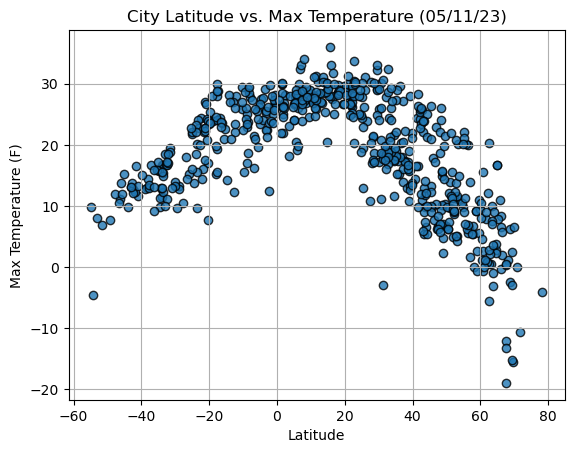

In [9]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"],
            city_data_df["Max Temp"],
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

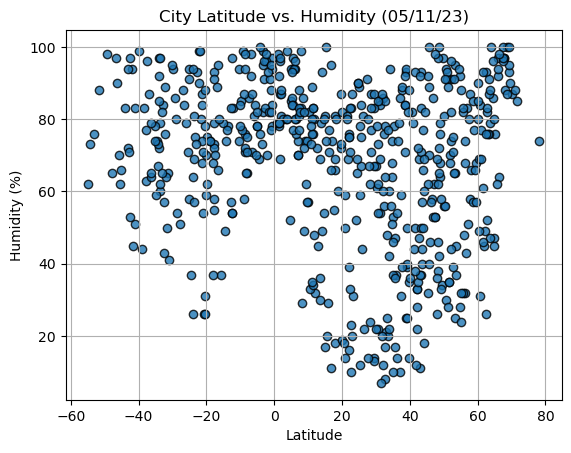

In [10]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"],
            city_data_df["Humidity"],
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")


# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

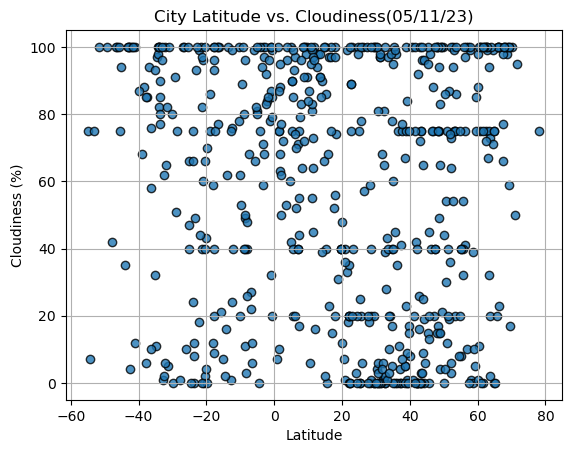

In [11]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"],
            city_data_df["Cloudiness"],
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")
# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude vs. Cloudiness(%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

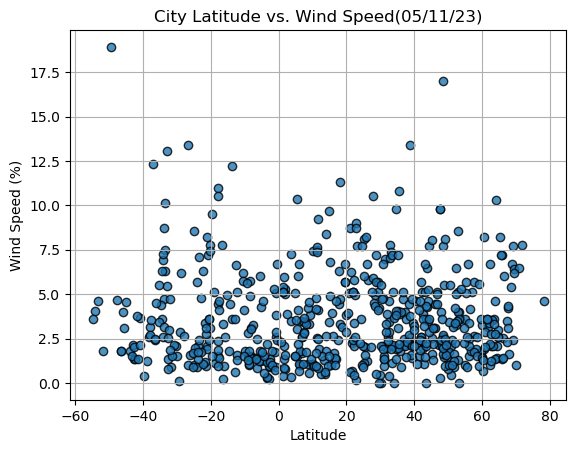

In [12]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"],
            city_data_df["Wind Speed"],
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")
# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude vs. Wind Speed(%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE


def linear_regression_plot(x, y,text):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x,y) 
    graph=x * slope + intercept 
    line_eq= "y =" + str(round(slope,2)) + "x +" + str(round(intercept,2))
    plt.scatter (x,y)
    plt.plot (x, graph, "r-")
    #plt.annotate(line_eq, color ="red")
    plt.xlabel("temperature")
    plt.ylabel("Lat")
    print(f"The r-value is:{rvalue**2}")
    


In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,las tablas,7.7667,-80.2833,28.99,99,83,3.42,PA,1683848242
1,illizi,26.4833,8.4667,23.89,22,57,5.80,DZ,1683848243
4,bethel,41.3712,-73.4140,24.46,44,20,1.54,US,1683848021
5,harstad,68.7990,16.5293,6.20,100,98,6.71,NO,1683848244
7,larache,35.1932,-6.1557,19.04,78,100,1.94,MA,1683848244


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,olinda,-8.0089,-34.8553,27.85,65,40,3.09,BR,1683848050
3,cafayate,-26.0730,-65.9761,15.19,79,10,1.58,AR,1683848243
6,waitangi,-43.9535,-176.5597,9.90,83,35,1.79,NZ,1683848000
8,blackmans bay,-43.0167,147.3167,13.18,72,100,2.11,AU,1683848245
9,geraldton,-28.7667,114.6000,13.23,54,75,6.17,AU,1683848245


###  Temperature vs. Latitude Linear Regression Plot

The r-value is:0.6578828095454076


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,las tablas,7.7667,-80.2833,28.99,99,83,3.42,PA,1683848242
1,illizi,26.4833,8.4667,23.89,22,57,5.80,DZ,1683848243
4,bethel,41.3712,-73.4140,24.46,44,20,1.54,US,1683848021
5,harstad,68.7990,16.5293,6.20,100,98,6.71,NO,1683848244
7,larache,35.1932,-6.1557,19.04,78,100,1.94,MA,1683848244
...,...,...,...,...,...,...,...,...,...
582,liezen,47.5667,14.2333,8.32,98,100,0.26,AT,1683848388
583,mokhsogollokh,61.4681,128.9203,1.24,46,100,3.60,RU,1683848389
584,ujae,8.9322,165.7642,27.78,82,91,4.58,MH,1683848389


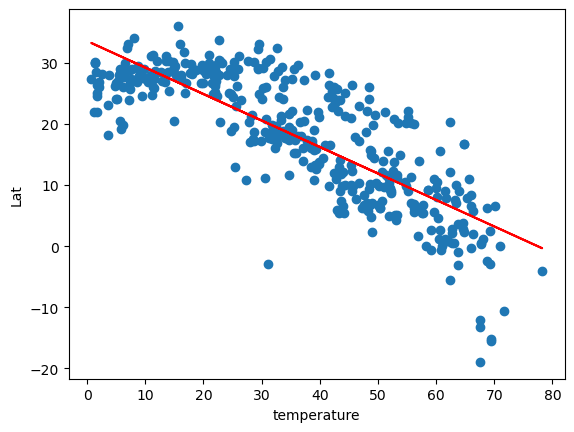

In [16]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE

#linear_regression_plot(x=city_data_df["Max Temp"],y=city_data_df["Lat"],text="weather")

x = northern_hemi_df["Lat"]
y = northern_hemi_df["Max Temp"]

linear_regression_plot(x, y,(6,-10))


northern_hemi_df

The r-value is:0.6099160417718099


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,olinda,-8.0089,-34.8553,27.85,65,40,3.09,BR,1683848050
3,cafayate,-26.0730,-65.9761,15.19,79,10,1.58,AR,1683848243
6,waitangi,-43.9535,-176.5597,9.90,83,35,1.79,NZ,1683848000
8,blackmans bay,-43.0167,147.3167,13.18,72,100,2.11,AU,1683848245
9,geraldton,-28.7667,114.6000,13.23,54,75,6.17,AU,1683848245
...,...,...,...,...,...,...,...,...,...
565,katabu,-4.9333,122.5167,26.65,82,100,1.73,ID,1683848384
567,canela,-29.3656,-50.8156,9.60,86,91,0.10,BR,1683848384
573,port augusta,-32.5000,137.7667,17.13,43,62,2.52,AU,1683848386


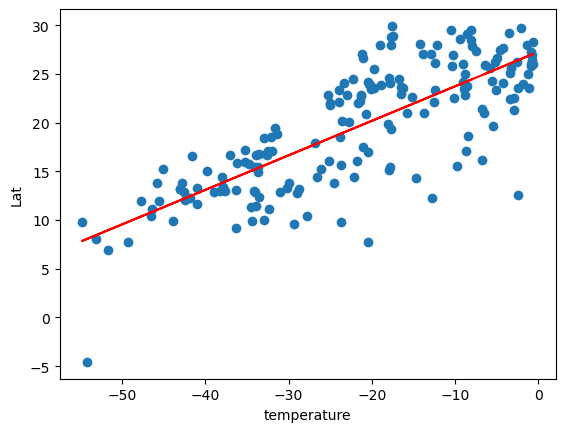

In [17]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

x = southern_hemi_df["Lat"]
y = southern_hemi_df["Max Temp"]
linear_regression_plot(x, y,(6,-10))

southern_hemi_df

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is:6.526595069601302e-05


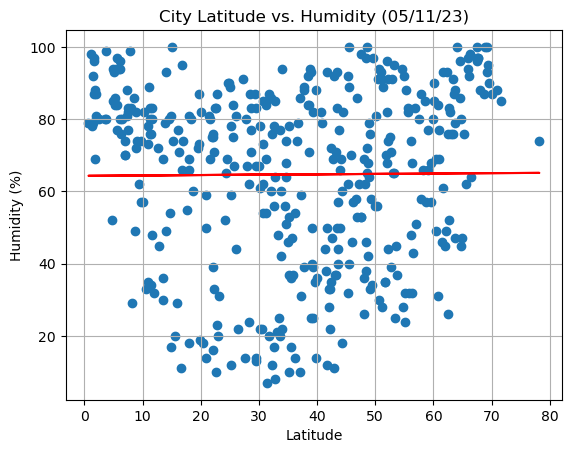

In [18]:
# Northern Hemisphere
# YOUR CODE HERE
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Humidity"]

linear_regression_plot(x, y,(6,-10))
northern_hemi_df

plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

The r-value is:0.02950017091730438


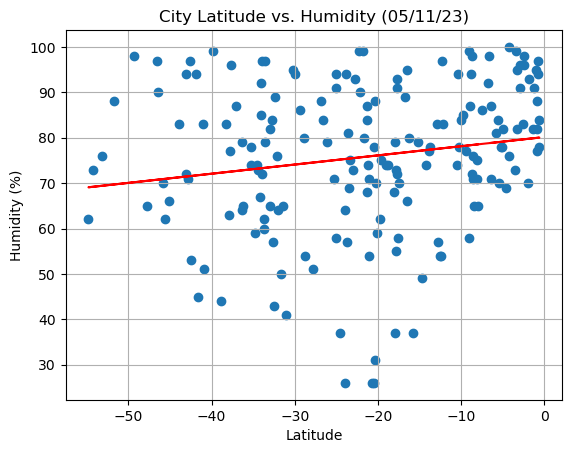

In [19]:
# Southern Hemisphere
# YOUR CODE HERE
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Humidity"]

linear_regression_plot(x, y,(6,-10))
southern_hemi_df

plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is:0.000435571283110515


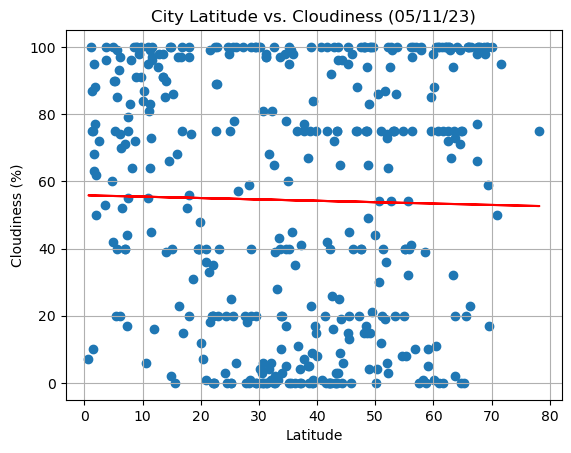

In [20]:
# Northern Hemisphere
# YOUR CODE HERE
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Cloudiness"]

linear_regression_plot(x, y,(6,-10))
northern_hemi_df

plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

The r-value is:0.0038055097299425533


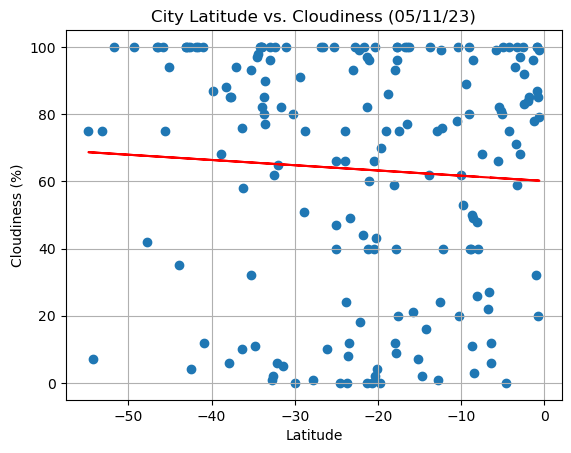

In [21]:
# Southern Hemisphere
# YOUR CODE HERE
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Cloudiness"]

linear_regression_plot(x, y,(6,-10))
southern_hemi_df

plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is:0.00026464340120855835


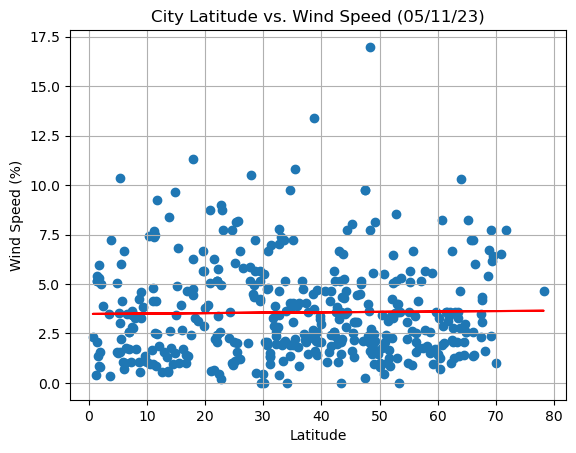

In [22]:
# Northern Hemisphere
# YOUR CODE HERE
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Wind Speed"]

linear_regression_plot(x, y,(6,-10))
northern_hemi_df

plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (%)")
plt.grid(True)

The r-value is:0.03320809306359256


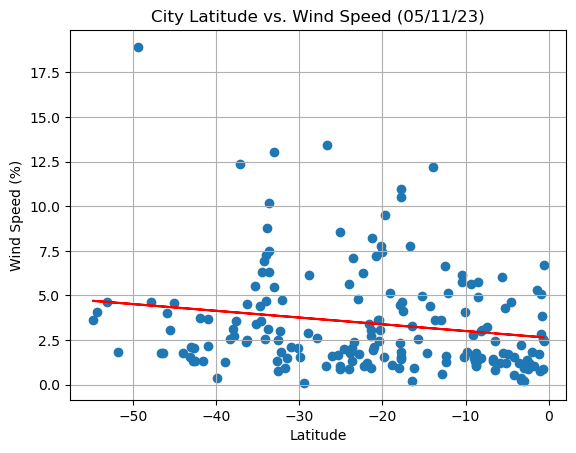

In [23]:
# Southern Hemisphere
# YOUR CODE HERE
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Wind Speed"]

linear_regression_plot(x, y,(6,-10))
southern_hemi_df

plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (%)")
plt.grid(True)

**Discussion about the linear relationship:** YOUR RESPONSE HERE